Environment ready. Python version: 2.0.2
Demo dataset generated: (50, 16)
Features shape: (50, 12) Labels shape: (50, 3)


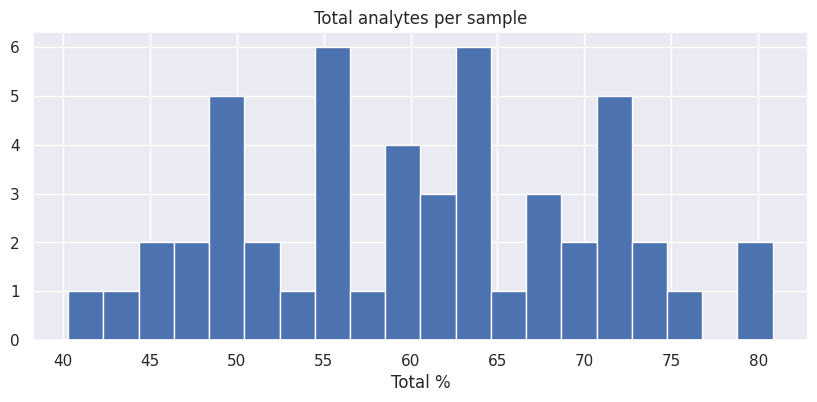

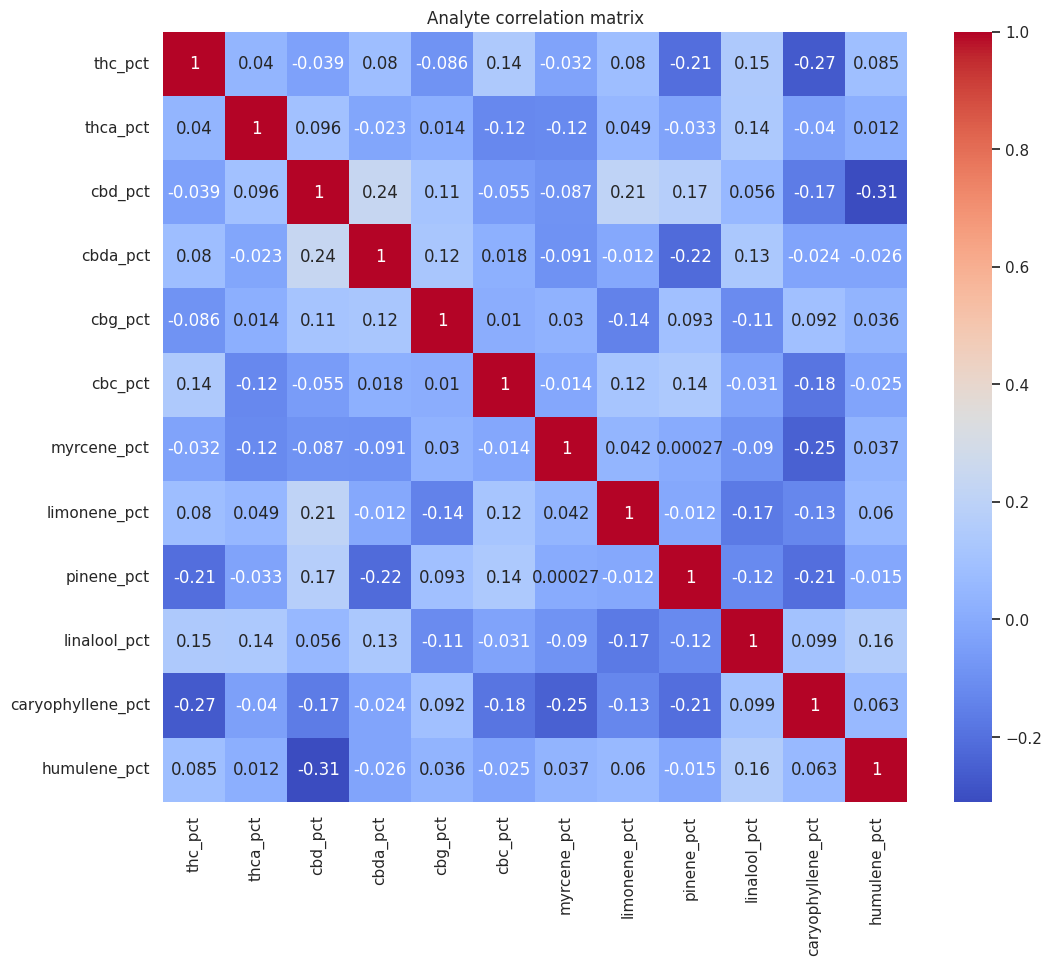


=== Training label: reduces_stress ===
RandomForest report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10


=== Training label: analgesic ===
RandomForest report:
               precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.20      0.25      0.22         4

    accuracy                           0.30        10
   macro avg       0.30      0.29      0.29        10
weighted avg       0.32      0.30      0.31        10


=== Training label: low_psychoactivity ===
RandomForest report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.33      0.40      0.36         

/tmp/ipython-input-568322036.py:92: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sample, show=True)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


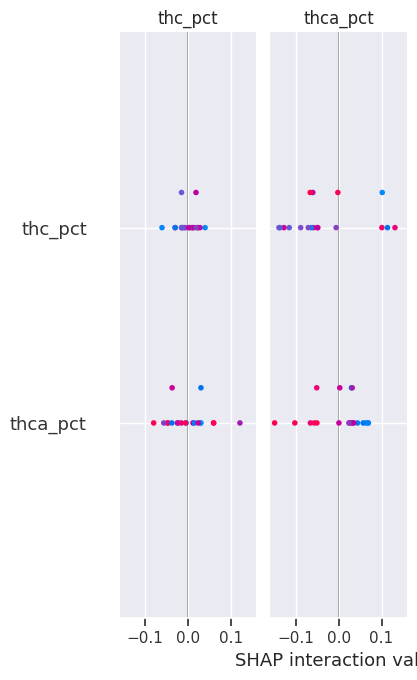


=== SHAP for label: analgesic ===


/tmp/ipython-input-568322036.py:92: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sample, show=True)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


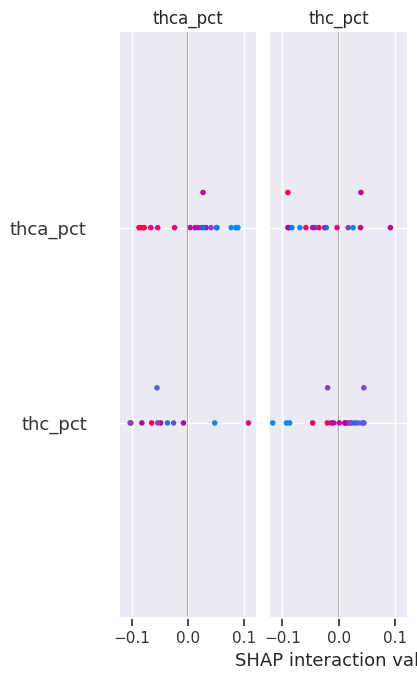


=== SHAP for label: low_psychoactivity ===


/tmp/ipython-input-568322036.py:92: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sample, show=True)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


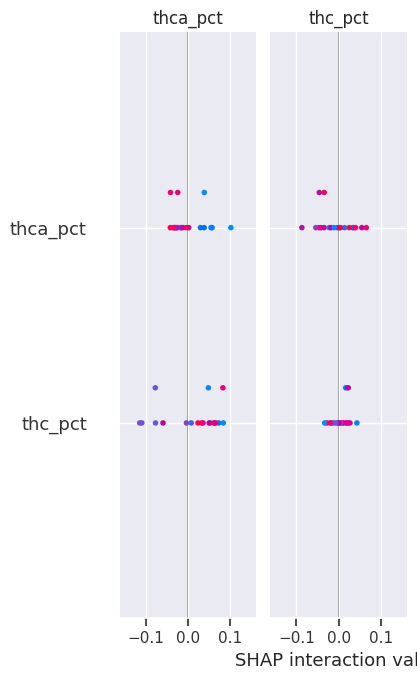

Epoch 20/100 Loss: 25.1300
Epoch 40/100 Loss: 25.1286
Epoch 60/100 Loss: 25.1286
Epoch 80/100 Loss: 25.1286
Epoch 100/100 Loss: 25.1286

=== Generated candidate strain profiles ===


,thc_pct,thca_pct,cbd_pct,cbda_pct,cbg_pct,cbc_pct,myrcene_pct,limonene_pct,pinene_pct,linalool_pct,caryophyllene_pct,humulene_pct
0,0.555770,0.723744,0.545089,0.667084,0.631677,0.618963,0.600773,0.641451,0.603360,0.715584,0.584667,0.597529
1,0.585007,0.736101,0.597716,0.718123,0.646207,0.669052,0.644708,0.658614,0.617998,0.734276,0.599036,0.636881
2,0.658701,0.820664,0.708571,0.807585,0.773400,0.733485,0.781640,0.757130,0.702128,0.813918,0.705013,0.706781
3,0.608867,0.776205,0.634051,0.753778,0.714490,0.670098,0.710575,0.707394,0.674234,0.779193,0.659581,0.653471
4,0.582061,0.755575,0.590029,0.724405,0.694928,0.645686,0.668154,0.668299,0.637820,0.754424,0.610625,0.641732


Generated candidate strains saved to 'generated_candidate_strains.csv'


In [1]:
# =============================================
# 🌿 Pheno Hunting for Cannabis — Google Colab Prototype
# =============================================
# Purpose: Hybrid AI/ML tool for cannabis pheno-hunting
# - Supervised learning: Predict therapeutic effects from cannabinoid/terpene profiles
# - Generative modeling (autoencoder): Propose new strain profiles targeting desired effects
# Scope & Disclaimer: Research-only, Cannabis sativa L. (≤0.3% Δ9-THC)
# Use only legally obtained datasets; de-identify patient data
# =============================================

# -------------------------
# Environment setup
# -------------------------
!pip install -q pandas numpy scikit-learn matplotlib seaborn torch torchvision shap
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import shap
print("Environment ready. Python version:", np.__version__)

# -------------------------
# Demo dataset / Upload
# -------------------------
DEMO_MODE = True  # Set False to upload your own CSV
if DEMO_MODE:
    np.random.seed(42)
    cannabinoids = ['thc_pct','thca_pct','cbd_pct','cbda_pct','cbg_pct','cbc_pct']
    terpenes = ['myrcene_pct','limonene_pct','pinene_pct','linalool_pct','caryophyllene_pct','humulene_pct']
    label_cols = ['reduces_stress','analgesic','low_psychoactivity']
    df = pd.DataFrame(np.random.rand(50,len(cannabinoids+terpenes))*10, columns=cannabinoids+terpenes)
    for lbl in label_cols:
        df[lbl] = np.random.randint(0,2,size=50)
    df['sample_id'] = [f"sample_{i}" for i in range(len(df))]
    print("Demo dataset generated:", df.shape)
else:
    from google.colab import files
    uploaded = files.upload()
    csv_name = list(uploaded.keys())[0]
    df = pd.read_csv(csv_name)
    cannabinoids = [c for c in df.columns if 'thc' in c or 'cbd' in c or 'cbg' in c or 'cbc' in c]
    terpenes = [c for c in df.columns if c not in cannabinoids + ['sample_id'] + label_cols]
    print("Uploaded dataset:", df.shape)

# -------------------------
# Preprocessing
# -------------------------
X = df[cannabinoids + terpenes].copy().fillna(0)
y = df[label_cols].copy()
print("Features shape:", X.shape, "Labels shape:", y.shape)

# -------------------------
# Exploratory Data Analysis
# -------------------------
plt.figure(figsize=(10,4))
X.sum(axis=1).hist(bins=20)
plt.title("Total analytes per sample")
plt.xlabel("Total %")
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Analyte correlation matrix")
plt.show()

# -------------------------
# Supervised model — RandomForest
# -------------------------
trained_models = {}
for lbl in label_cols:
    print("\n=== Training label:", lbl, "===")
    y_label = y[lbl].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y_label, stratify=y_label, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("RandomForest report:\n", classification_report(y_test, y_pred))
    trained_models[lbl] = rf

# -------------------------
# SHAP feature importance
# -------------------------
for lbl, model in trained_models.items():
    print("\n=== SHAP for label:", lbl, "===")
    explainer = shap.TreeExplainer(model)
    sample = X.sample(n=min(20,len(X)), random_state=42)
    shap_values = explainer.shap_values(sample)
    shap.summary_plot(shap_values, sample, show=True)

# -------------------------
# Generative Autoencoder Prototype
# -------------------------
input_dim = X.shape[1]
latent_dim = 6
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 12),
            nn.ReLU(),
            nn.Linear(12, latent_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 12),
            nn.ReLU(),
            nn.Linear(12, input_dim),
            nn.Sigmoid()
        )
    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, z

ae = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(ae.parameters(), lr=0.01)
X_tensor = torch.tensor(X.values, dtype=torch.float32)

# Train autoencoder (simple prototype)
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    X_hat, _ = ae(X_tensor)
    loss = criterion(X_hat, X_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1)%20 == 0:
        print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item():.4f}")

# Generate candidate strains by sampling latent space
with torch.no_grad():
    z_sample = torch.rand(5, latent_dim)
    generated = ae.decoder(z_sample).numpy()
generated_df = pd.DataFrame(generated, columns=X.columns)
print("\n=== Generated candidate strain profiles ===")
display(generated_df)

# -------------------------
# Save generated candidates
# -------------------------
generated_df.to_csv("generated_candidate_strains.csv", index=False)
print("Generated candidate strains saved to 'generated_candidate_strains.csv'")







